In [2]:
from prac_code.tables import start
start()

In [70]:
import pandas as pd
tab1 = pd.read_csv("tables/1.tab", sep="\t")
tab2 = pd.read_csv("tables/2.tab", sep="\t")
tab3 = pd.read_csv("tables/3.tab", sep="\t")

In [71]:
from prac_code.value import Value
tab1["Ub"] = tab1["Ub"].apply(Value)
tab1["Ib"] = tab1["Ib"].apply(Value)
tab1["Ub"] += Value(values=[0.0], syst=0.01)
tab1["Ib"] += Value(values=[0.0], syst=0.01)
tab1

,Ub,Ib
0,0.000 ± 0.010,0.000 ± 0.010
1,0.100 ± 0.010,0.000 ± 0.010
2,0.200 ± 0.010,0.000 ± 0.010
3,0.300 ± 0.010,0.000 ± 0.010
4,0.400 ± 0.010,0.000 ± 0.010
5,0.500 ± 0.010,0.000 ± 0.010
6,0.600 ± 0.010,0.010 ± 0.010
7,0.620 ± 0.010,0.020 ± 0.010
8,0.640 ± 0.010,0.030 ± 0.010
9,0.660 ± 0.010,0.080 ± 0.010


In [72]:
tab2["Ib"] = tab2["Ib"].apply(Value)
tab2["Ik"] = tab2["Ik"].apply(Value)
tab2["Ib"] += Value(values=[0.0], syst=0.05)
tab2["Ik"] += Value(values=[0.0], syst=1)
tab2

,Ib,Ik
0,0.00 ± 0.05,0.0 ± 1.0
1,0.10 ± 0.05,30.0 ± 1.0
2,0.20 ± 0.05,70.0 ± 1.0
3,0.30 ± 0.05,120.0 ± 1.0
4,0.40 ± 0.05,160.0 ± 1.0
5,0.50 ± 0.05,200.0 ± 1.0
6,0.60 ± 0.05,240.0 ± 1.0
7,0.70 ± 0.05,280.0 ± 1.0
8,0.80 ± 0.05,320.0 ± 1.0


In [73]:
tab3["Uk"] = tab3["Uk"].apply(Value)
tab3["Ik"] = tab3["Ik"].apply(Value)
tab3["Uk"] += Value(values=[0.0], syst=0.01)
tab3["Ik"] += Value(values=[0.0], syst=10)
tab3["P"] = tab3["Uk"] * tab3["Ik"]
tab3["Ik"][3] = tab3["Ik"][3] - 10
tab3["Ik"][4] = tab3["Ik"][4] - 10
tab3["Ik"][6] = tab3["Ik"][6] + 10

In [74]:
tab3

,Uk,Ik,P
0,0.130 ± 0.010,20 ± 10,2.6 ± 1.3
1,0.190 ± 0.010,40 ± 10,7.6 ± 1.9
2,0.250 ± 0.010,50 ± 10,12 ± 3
3,0.310 ± 0.010,70 ± 10,25 ± 3
4,0.380 ± 0.010,80 ± 10,34 ± 4
5,0.450 ± 0.010,130 ± 10,58 ± 5
6,0.520 ± 0.010,90 ± 10,42 ± 5
7,0.570 ± 0.010,100 ± 10,57 ± 6
8,0.610 ± 0.010,120 ± 10,73 ± 6
9,0.690 ± 0.010,150 ± 10,103 ± 7


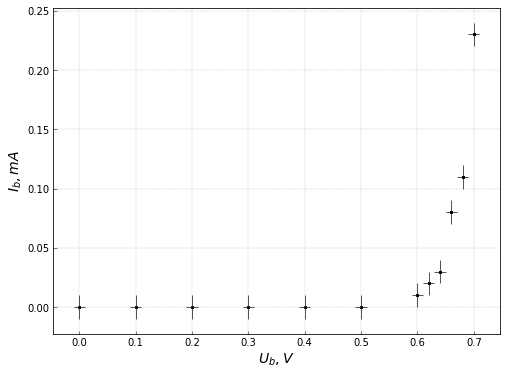

[]

In [75]:
from prac_code.plotter import Plotter
Plotter(draw_legend=False).set_name("1").set_title("").set_y_name("$I_b, mA$").set_x_name(
        "$U_b, V$"). \
        add_line(Plotter.get_new_line(y_value=tab1['Ib'], x_value=tab1["Ub"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

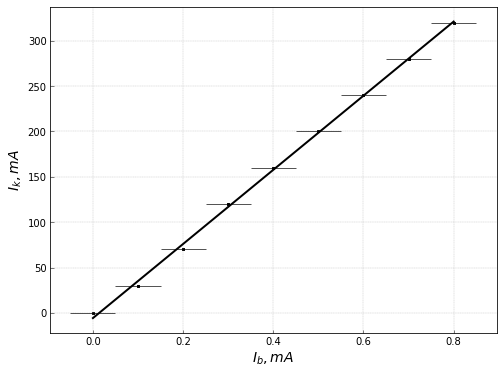

In [76]:
[fit, *_] = Plotter(draw_legend=False).set_name("2").set_title("").set_y_name("$I_k, mA$").set_x_name(
        "$I_b, mA$"). \
        add_line(Plotter.get_new_line(y_value=tab2['Ik'], x_value=tab2["Ib"],
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [77]:
print("beta = {}".format(Value(values=[fit.a], syst=fit.sigma_a)))

beta = 408 ± 5


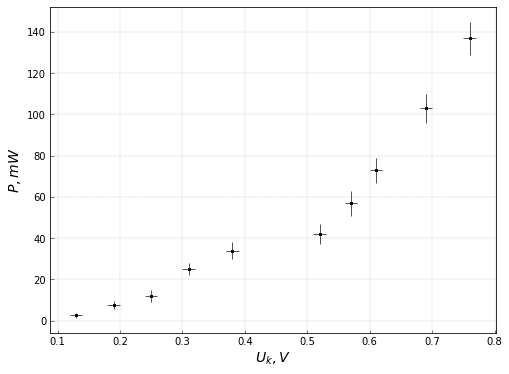

[]

In [78]:
Plotter(draw_legend=False).set_name("4").set_title("").set_y_name("$P, mW$").set_x_name(
        "$U_k, V$"). \
        add_line(Plotter.get_new_line(y_value=tab3[tab3.index != 5]['P'], x_value=tab3[tab3.index != 5]["Uk"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

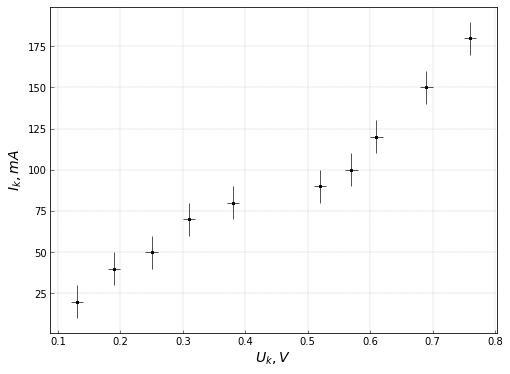

[]

In [79]:
Plotter(draw_legend=False).set_name("3").set_title("").set_y_name("$I_k, mA$").set_x_name(
        "$U_k, V$"). \
        add_line(Plotter.get_new_line(y_value=tab3[tab3.index != 5]['Ik'], x_value=tab3[tab3.index != 5]["Uk"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)